In [ ]:
import numpy as np
from packaging import version
import subprocess
import sys
# Following code required owing to the issue here https://github.com/h2oai/h2o-3/issues/16462 , once numpy 2 is supported the code can be removed
# Check if current NumPy is >= 2
if version.parse(np.__version__) >= version.parse("2.0"):
    print(f"Detected NumPy {np.__version__}, reinstalling < 2.0...")
    !pip install --force-reinstall --no-cache-dir "numpy<2"
    # Restart runtime manually
else:
    print(f"NumPy {np.__version__} is already < 2.0. No action needed.")


NumPy 1.26.4 is already < 2.0. No action needed.


In [ ]:
!pip install h2o
import os

In [ ]:
import re

In [ ]:
import matplotlib.pyplot as plt
def save_classification_metrics_and_plots(model, data, save_path):
    """
    Save important classification metrics and plots to a file.

    Args:
        model (H2OModel): The classification model.
        data (H2OFrame): The dataset for evaluation.
        save_path (str): The directory path where metrics and plots will be saved.

    Returns:
        None
    """
    # Create a directory to save the files
    os.makedirs(save_path, exist_ok=True)

    # Compute confusion matrix using the perf object
    perf = model.model_performance(data)
    confusion = perf.confusion_matrix()

    with open(os.path.join(save_path, 'confusion_matrix.txt'), 'w') as confusion_file:
      confusion_file.write(str(confusion))

    # Save the confusion matrix as a CSV file
    #confusion.to_csv(os.path.join(save_path, 'confusion_matrix.csv'))

    # Save classification metrics to a text file
    with open(os.path.join(save_path, 'classification_metrics.txt'), 'w') as metrics_file:
        metrics_file.write(f"Accuracy: {perf.accuracy()}\n")
        metrics_file.write(f"Precision: {perf.precision()}\n")
        metrics_file.write(f"Recall: {perf.recall()}\n")
        metrics_file.write(f"F1 Score: {perf.F1()}\n")

    roc_curve_file = f"{save_path}/roc_curve.png"

    # Use the plot function with save_to_file parameter to save the plots to files
    perf.plot(type="roc", save_to_file=roc_curve_file)

    # Save AUC to a text file
    auc = perf.auc()
    with open(os.path.join(save_path, 'auc.txt'), 'w') as auc_file:
        auc_file.write(f"AUC: {auc}\n")



In [ ]:
import h2o
import pandas as pd
# helper function to format grid search results

In [ ]:
def performance_table_class(models, train_data, valid_data):
    model_perf = []
    for model in models:
        model_id = model.model_id
        train_logloss = model.logloss(train = True)
        cv_logloss = model.logloss(xval = True)
        valid_logloss = model.logloss(valid = True)

        # Compute classification metrics for the validation data
        valid_performance = model.model_performance(valid_data)
        accuracy = valid_performance.accuracy()[0][1]
        f1_scores = valid_performance.F1()
        #weighted_f1 = sum([f1[1] * valid_data['pendency_model_multiyear'].table()['N'][i] for i, f1 in enumerate(f1_scores)])
        auc = valid_performance.auc()


        model_perf.append([model_id, train_logloss, cv_logloss, valid_logloss, accuracy, f1_scores , auc])


    model_perf_df = pd.DataFrame(model_perf, columns=["model", "train_logloss", "cv_logloss", "valid_logloss", "accuracy", "f1", "auc"])
    model_perf_df = model_perf_df.sort_values(by="valid_logloss")

    return model_perf_df



In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
h2o.init(max_mem_size = "45g")


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph0_irpdt
  JVM stdout: /tmp/tmph0_irpdt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph0_irpdt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_0yk6pk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,45 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/Model1cData_2010to2018_merged_criminal.csv')
#cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/automl_2010to2018_merged_all.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'female_adv_def': 'int',
 'female_adv_pet': 'int',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'int',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'int',
 'muslim_adv_pet': 'int',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
#Remove all columns not available at time of case filing

# List of columns to keep
columns_to_keep = cases2010to2018_h2o.columns

columns_to_keep.remove("female_judge_decision")
columns_to_keep.remove("decision_judge_tenure_at_decision")
columns_to_keep.remove("pendency_first_filing")
columns_to_keep.remove("judgediff")
#Drop columns related to advocate and religion
columns_to_keep.remove("muslim_defendant")
columns_to_keep.remove("muslim_petitioner")
columns_to_keep.remove("muslim_adv_def")
columns_to_keep.remove("muslim_adv_pet")
columns_to_keep.remove("female_adv_def")
columns_to_keep.remove("female_adv_pet")

# Use the assign method to drop columns
cases2010to2018_h2o = cases2010to2018_h2o[columns_to_keep]


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o

state_code,female_defendant,female_petitioner,billable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,nan,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,nan,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
#TBD to be converted to embeddings
cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].asfactor()
#cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].ascharacter()

In [ ]:
# Change types
cases2010to2018_h2o['state_code'] = cases2010to2018_h2o['state_code'].asfactor()
cases2010to2018_h2o['female_defendant'] = cases2010to2018_h2o['female_defendant'].asfactor()


In [ ]:
cases2010to2018_h2o.types

{'state_code': 'enum',
 'female_defendant': 'enum',
 'female_petitioner': 'enum',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'act_s': 'enum',
 'section_s': 'enum',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o.head()

state_code,female_defendant,female_petitioner,billable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


In [ ]:
print(len(cases2010to2018_h2o))

22389955


In [ ]:
#change name of billable to bailable_IPC
new_column_name = "bailable_ipc"
old_column_name = "billable_ipc"

# Get the current column names as a list
column_names = cases2010to2018_h2o.columns

# Find the index of the column you want to rename
column_index = column_names.index(old_column_name)

# Replace the old column name with the new one
column_names[column_index] = new_column_name

# Set the new column names for the DataFrame
cases2010to2018_h2o.set_names(column_names)

state_code,female_defendant,female_petitioner,bailable_ipc,female_judge_filing,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
1,0,-9998 unclear,bailable,0 nonfemale,1_1_1,1_1,ontime,4,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one
1,0,0 male,NA,1 female,1_2_1,1_2,delayed,66,Code of Criminal Procedure,397,cri.rev.app.,District And Sessions Court,NA
1,-9998,-9998 unclear,NA,0 nonfemale,1_2_2,1_2,ontime,1,Code of Criminal Procedure,457,NA,Chief Judicial Magistrate,NA
1,0,-9998 unclear,non-bailable,0 nonfemale,1_2_7,1_2,delayed,1,The Indian Penal Code,452,NA,Civil Judge Junior Division,5 to 10
1,0,1 female,NA,0 nonfemale,1_3_11,1_3,ontime,3,Code of Criminal Procedure,125,NA,Criminal Cases Others,NA
1,0,-9998 unclear,NA,0 nonfemale,1_3_19,1_3,delayed,22,The Indian Penal Code,,r.c.c.,Criminal Cases Others,one
1,0,-9998 unclear,non-bailable,0 nonfemale,1_4_13,1_4,ontime,29,The Indian Penal Code,420,NA,civil judge,one
1,-9998,0 male,NA,0 nonfemale,1_5_2,1_5,ontime,0,The Indian Penal Code,,NA,Chief Judicial Magistrate,one
1,-9998,0 male,NA,0 nonfemale,1_7_1,1_7,ontime,12,Code of Criminal Procedure,438,NA,District And Sessions Court,NA
1,0,-9998 unclear,bailable,0 nonfemale,1_7_2,1_7,ontime,2,The Indian Penal Code,283,NA,Chief Judicial Magistrate,one


#### Feature Perturbation

In [ ]:
from scipy.stats import ttest_ind
# Load your H2OFrame (assumes it is already available)
df_h2o = cases2010to2018_h2o

# STEP 0a: Cache observed 0/1 values immediately for reassignment ratios
df_h2o['female_defendant'] = df_h2o['female_defendant'].asnumeric()

observed_cache_mask = df_h2o['female_defendant'].isin([0, 1])
observed_cache = df_h2o[observed_cache_mask, :]
observed_pd_cache = observed_cache['female_defendant'].as_data_frame()
observed_pd_cache['female_defendant'] = pd.to_numeric(observed_pd_cache['female_defendant'], errors='coerce')

# Compute ratios safely here and reuse later
ratios = observed_pd_cache['female_defendant'].value_counts(normalize=True)
male_ratio = ratios.get(0, 0)
female_ratio = ratios.get(1, 0)

# Normalize to ensure total is 1
total = male_ratio + female_ratio
if total == 0:
    raise ValueError("No valid observed male/female values found in original dataset.")
male_ratio /= total
female_ratio /= total

print(f"Male ratio: {male_ratio:.4f}")
print(f"Female ratio: {female_ratio:.4f}")

# STEP 0: Create binary flag for on-time
df_h2o['ontime_flag'] = df_h2o['pendency_model_multiyear'] == "ontime"

# STEP 1: Count values of female_defendant
print("Original counts of female_defendant values:")
print(df_h2o['female_defendant'].table())

# STEP 2: Grouped counts by female_defendant and pendency_model_multiyear
group_counts = df_h2o.group_by(['female_defendant', 'pendency_model_multiyear']).count().get_frame()
print("\nGrouped counts by female_defendant and pendency_model_multiyear:")
print(group_counts)

# STEP 3: T-test before reassignment
# Get all unique values of female_defendant
group_vals = df_h2o['female_defendant'].unique().as_data_frame().values.flatten()

# Fix type mismatch during filtering
grouped_data = {}
for val in group_vals:
    val_int = int(val)
    mask = df_h2o['female_defendant'] == h2o.H2OFrame([[val_int]])
    ontime_series = df_h2o[mask, 'ontime_flag'].as_data_frame(use_pandas=True).astype(int)['ontime_flag']
    grouped_data[val_int] = ontime_series

# Run pairwise t-tests
t_test_results = {}
keys = sorted(grouped_data.keys())
for i in range(len(keys)):
    for j in range(i+1, len(keys)):
        t_stat, p_val = ttest_ind(grouped_data[keys[i]], grouped_data[keys[j]], equal_var=False)
        t_test_results[f"{keys[i]} vs {keys[j]}"] = {"t_stat": t_stat, "p_val": p_val}


# STEP 5: Reassign -9998 and -9999 in that ratio (with correct alignment)

# Extract column as DataFrame with preserved index
full_gender_col_df = df_h2o['female_defendant'].as_data_frame(use_pandas=True)

# Identify actual indices where value is -9998 or -9999
unclear_indices = full_gender_col_df[
    full_gender_col_df['female_defendant'].isin([-9998, -9999])
].index

# Generate reassigned values in observed male/female ratio
np.random.seed(42)
reassigned_vals = np.random.choice([0, 1], size=len(unclear_indices), p=[male_ratio, female_ratio])

# Apply reassignment to correct indices
full_gender_col_df.loc[unclear_indices, 'female_defendant'] = reassigned_vals

# Convert back to H2OFrame and assign to original frame
df_h2o['female_defendant'] = h2o.H2OFrame(full_gender_col_df)


# STEP 6: Repeat T-tests after reassignment
group_vals_post = df_h2o['female_defendant'].unique().as_data_frame().values.flatten()

grouped_data_post = {}
for val in group_vals_post:
    val_int = int(val)
    mask = df_h2o['female_defendant'] == h2o.H2OFrame([[val_int]])
    ontime_series = df_h2o[mask, 'ontime_flag'].as_data_frame(use_pandas=True).astype(int)['ontime_flag']
    grouped_data_post[val_int] = ontime_series

post_t_test_results = {}
keys_post = sorted(grouped_data_post.keys())
for i in range(len(keys_post)):
    for j in range(i+1, len(keys_post)):
        t_stat, p_val = ttest_ind(grouped_data_post[keys_post[i]], grouped_data_post[keys_post[j]], equal_var=False)
        post_t_test_results[f"{keys_post[i]} vs {keys_post[j]}"] = {"t_stat": t_stat, "p_val": p_val}

# STEP 7: Display results
print("\n🔍 T-test results before reassignment:")
for k, v in t_test_results.items():
    print(f"{k}: t = {v['t_stat']:.4f}, p = {v['p_val']:.4f}")

print("\n✅ T-test results after reassignment:")
for k, v in post_t_test_results.items():
    print(f"{k}: t = {v['t_stat']:.4f}, p = {v['p_val']:.4f}")


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Male ratio: 0.8917
Female ratio: 0.1083
Original counts of female_defendant values:
  female_defendant            Count
             -9999  39799
             -9998      6.07411e+06
                 0      1.45139e+07
                 1      1.76218e+06
[4 rows x 2 columns]


Grouped counts by female_defendant and pendency_model_multiyear:
  female_defendant  pendency_model_multiyear                nrow
             -9999  delayed                      15230
             -9999  ontime                       24569
             -9998  delayed                          1.09503e+06
             -9998  ontime                           4.97908e+06
                 0  delayed                          7.02812e+06
                 0  ontime                           7.48575e+06
                 1  delayed                     804887
                 1  ontime                      957295
[8 rows x 3 columns]



/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"



🔍 T-test results before reassignment:
-9999 vs -9998: t = -82.9031, p = 0.0000
-9999 vs 0: t = 41.6256, p = 0.0000
-9999 vs 1: t = 30.0529, p = 0.0000
-9998 vs 0: t = 1491.4021, p = 0.0000
-9998 vs 1: t = 680.3582, p = 0.0000
0 vs 1: t = -69.1269, p = 0.0000

✅ T-test results after reassignment:
0 vs 1: t = -59.7295, p = 0.0000


In [ ]:
print("Post-reassignment categories:")
print(df_h2o['female_defendant'].table())

Post-reassignment categories:
  female_defendant        Count
                 0  1.99666e+07
                 1  2.4234e+06
[2 rows x 2 columns]



In [ ]:
import pandas as pd

# STEP 7: Create summary comparison table with female (1) as reference
reference_group = 1
comparison_table = []

# Before reassignment
for key in sorted(grouped_data.keys()):
    if key == reference_group:
        continue
    mean_ref = grouped_data[reference_group].mean()
    mean_comp = grouped_data[key].mean()
    n_ref = len(grouped_data[reference_group])
    n_comp = len(grouped_data[key])
    t_stat, p_val = ttest_ind(grouped_data[reference_group], grouped_data[key], equal_var=False)
    comparison_table.append({
        'Group Compared': key,
        'Phase': 'Before Reassignment',
        'N (Ref)': n_ref,
        'N (Group)': n_comp,
        'On-time Rate (female_defendant = 1)': round(mean_ref, 4),
        'On-time Rate (Group)': round(mean_comp, 4),
        'Difference': round(mean_comp - mean_ref, 4),
        'p-value': round(p_val, 4)
    })

# After reassignment — ignore -9998/-9999 if still present
#valid_keys_post = [k for k in grouped_data_post.keys() if k in [0, 1]]  # only keep 0 and 1
for key in sorted(grouped_data_post):
    if key == reference_group:
        continue
    mean_ref = grouped_data_post[reference_group].mean()
    mean_comp = grouped_data_post[key].mean()
    n_ref = len(grouped_data_post[reference_group])
    n_comp = len(grouped_data_post[key])
    t_stat, p_val = ttest_ind(grouped_data_post[reference_group], grouped_data_post[key], equal_var=False)
    comparison_table.append({
        'Group Compared': key,
        'Phase': 'After Reassignment',
        'N (Ref)': n_ref,
        'N (Group)': n_comp,
        'On-time Rate (female_defendant = 1)': round(mean_ref, 4),
        'On-time Rate (Group)': round(mean_comp, 4),
        'Difference': round(mean_comp - mean_ref, 4),
        'p-value': round(p_val, 4)
    })

# Convert to DataFrame and print it
comparison_df = pd.DataFrame(comparison_table)
print("\n📊 On-time Rate Comparison Table (Reference: female_defendant = 1):")
print(comparison_df.to_string(index=False))



📊 On-time Rate Comparison Table (Reference: female_defendant = 1):
 Group Compared               Phase  N (Ref)  N (Group)  On-time Rate (female_defendant = 1)  On-time Rate (Group)  Difference  p-value
          -9999 Before Reassignment  1762182      39799                               0.5432                0.6173      0.0741      0.0
          -9998 Before Reassignment  1762182    6074111                               0.5432                0.8197      0.2765      0.0
              0 Before Reassignment  1762182   14513863                               0.5432                0.5158     -0.0275      0.0
              0  After Reassignment  2423397   19966558                               0.6182                0.5984     -0.0198      0.0


In [ ]:
full_gender_col_df = df_h2o['female_defendant'].as_data_frame(use_pandas=True)
revised_gender_col = h2o.H2OFrame(full_gender_col_df)
cases2010to2018_h2o['female_defendant'] = revised_gender_col
print("Updated `female_defendant` categories:")
print(cases2010to2018_h2o['female_defendant'].table())


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Updated `female_defendant` categories:
  female_defendant        Count
                 0  1.99666e+07
                 1  2.4234e+06
[2 rows x 2 columns]



In [ ]:
cases2010to2018_h2o.columns

['state_code',
 'female_defendant',
 'female_petitioner',
 'bailable_ipc',
 'female_judge_filing',
 'court_details',
 'state_district',
 'pendency_model_multiyear',
 'filing_judge_tenure_at_filing',
 'act_s',
 'section_s',
 'type_name_s',
 'judge_position_s',
 'number_sections_ipc_category',
 'ontime_flag']

In [ ]:
columns_to_keep = cases2010to2018_h2o.columns

columns_to_keep.remove("ontime_flag")

# Use the assign method to drop columns
cases2010to2018_h2o = cases2010to2018_h2o[columns_to_keep]

In [ ]:
cases2010to2018_h2o.columns

['state_code',
 'female_defendant',
 'female_petitioner',
 'bailable_ipc',
 'female_judge_filing',
 'court_details',
 'state_district',
 'pendency_model_multiyear',
 'filing_judge_tenure_at_filing',
 'act_s',
 'section_s',
 'type_name_s',
 'judge_position_s',
 'number_sections_ipc_category']

#### Predictive Modelling

In [ ]:
from h2o.estimators import H2ORandomForestEstimator
import copy

In [ ]:
cases2010to2018_train, cases2010to2018_test, cases2010to2018_valid = cases2010to2018_h2o.split_frame(ratios=[.7, .15])

In [ ]:
y = "pendency_model_multiyear"
x = cases2010to2018_h2o.columns
x.remove(y)


In [ ]:
x

['state_code',
 'female_defendant',
 'female_petitioner',
 'bailable_ipc',
 'female_judge_filing',
 'court_details',
 'state_district',
 'filing_judge_tenure_at_filing',
 'act_s',
 'section_s',
 'type_name_s',
 'judge_position_s',
 'number_sections_ipc_category']

In [ ]:
nfolds = 3
seed = 1234
search_criteria = {'seed': seed,'strategy': "RandomDiscrete", 'max_models': 2}

In [ ]:
default_drf_params = {
    'ntrees':50,
    'max_depth': 20,
    'min_rows': 1,
    'score_tree_interval': 5,
    'stopping_rounds': 3, # early stopping
    'col_sample_rate_per_tree': 1,
    'min_split_improvement' : 1e-05,
    'sample_rate':0.632,
    'stopping_metric':'logloss'
}

In [ ]:
best_guess_drfs = []
model_params = copy.deepcopy(default_drf_params)
drf = H2ORandomForestEstimator(nfolds=nfolds, seed=seed,**model_params)
drf.train(training_frame=cases2010to2018_train, validation_frame=cases2010to2018_valid, y=y, x=x)
best_guess_drfs = best_guess_drfs + [drf]

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.grid import H2OGridSearch

In [ ]:
drf_search_params = { 'ntrees': [50, 70],
                      'max_depth': [20, 30],
                      'sample_rate':[0.8]
                    }

In [ ]:
# remove parameters that are being searched from the default dictionary
for k in drf_search_params.keys():
    default_drf_params.pop(k, None)

In [ ]:
drf_grid = H2OGridSearch(model=H2ORandomForestEstimator,
                         grid_id='drf_grid',
                         search_criteria=search_criteria,
                         hyper_params=drf_search_params)
drf_grid.train(x=x, y=y,
               training_frame=cases2010to2018_train,
               validation_frame=cases2010to2018_valid,
               nfolds=nfolds,
               seed=seed,
               **default_drf_params)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,max_depth,ntrees,sample_rate,model_ids,logloss
,30.0,45.0,0.8,drf_grid_model_1,0.3950511
,20.0,33.0,0.8,drf_grid_model_2,0.4051227


In [ ]:
all_drf_models = best_guess_drfs + [h2o.get_model(id) for id in drf_grid.get_grid().model_ids]



In [ ]:
output_directory = "/content/drive/MyDrive/Law/criminalall-used-perturbation"
os.makedirs(output_directory, exist_ok=True)

In [ ]:
drf_perf = performance_table_class(all_drf_models,cases2010to2018_train,cases2010to2018_valid)
drf_perf.to_csv('/content/drive/MyDrive/Law/criminalall-used-perturbation/model_performance.csv', index=False)

In [ ]:
drf_perf

In [ ]:
best_model = h2o.get_model(drf_perf.iloc[0, 0])

In [ ]:
# View the parameters for the XGBoost model selected above
best_model.params.keys()

print(best_model.params.keys())

# Inspect individual parameter values
print(best_model.params['ntrees'])
print(best_model.params['max_depth'])
print(best_model.params['min_rows'])
print(best_model.params['score_tree_interval'])
print(best_model.params['stopping_rounds'])
print(best_model.params['col_sample_rate_per_tree'])
print(best_model.params['min_split_improvement'])
print(best_model.params['sample_rate'])
print(best_model.params['stopping_metric'])
print(best_model.params['stopping_tolerance'])

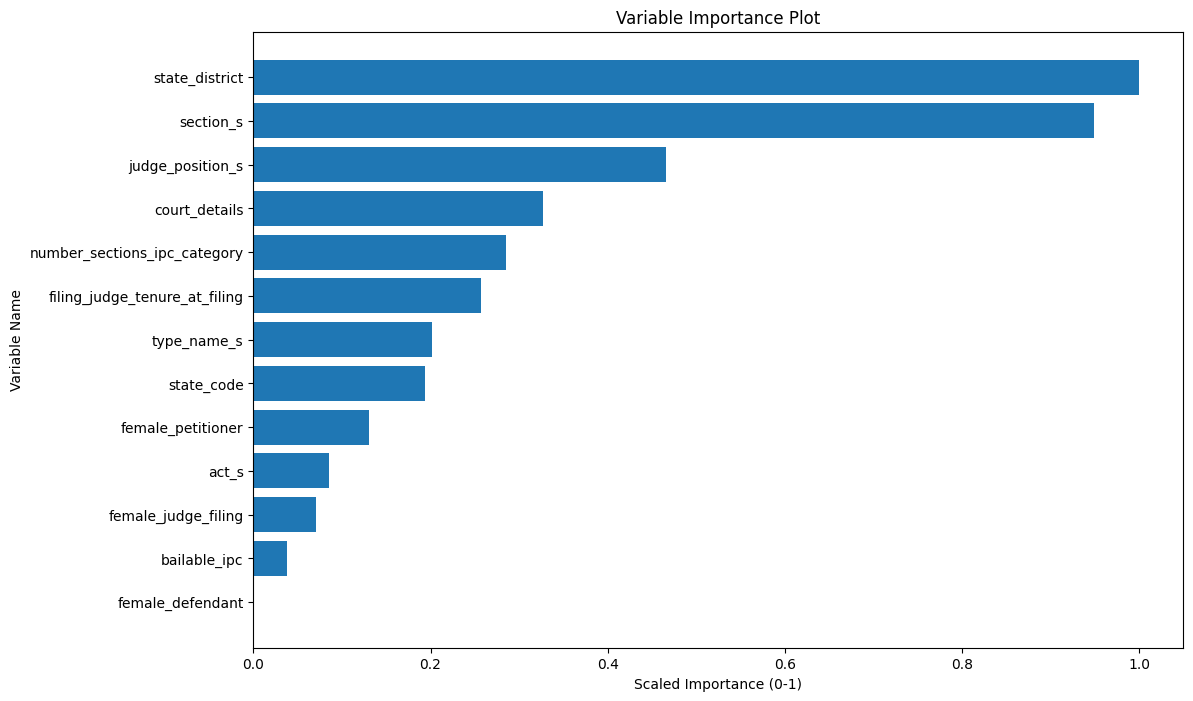

In [ ]:
# Get variable importance scores for all variables
varimp = best_model.varimp(use_pandas=True)
from sklearn.preprocessing import MinMaxScaler

# Sort the DataFrame by relative variable importance in descending order
varimp = varimp.sort_values(by='relative_importance', ascending=True)

# Min-Max scaling
scaler = MinMaxScaler()
varimp['scaled_importance'] = scaler.fit_transform(varimp[['relative_importance']])

# Create a bar plot for all variables and their importance scores
plt.figure(figsize=(12, 8))
plt.barh(varimp['variable'], varimp['scaled_importance'])
plt.xlabel('Scaled Importance (0-1)')
plt.ylabel('Variable Name')
plt.title('Variable Importance Plot')

# Save the plot to a file
plt.savefig('/content/drive/MyDrive/Law/criminalall-used-perturbation/variable_importance_plot.png')

plt.show()


In [ ]:
output_directory = "/content/drive/MyDrive/Law/criminalall-used-perturbation/performance"
os.makedirs(output_directory, exist_ok=True)

save_path = "/content/drive/MyDrive/Law/criminalall-used-perturbation/saved_models/"
os.makedirs(save_path, exist_ok=True)

/tmp/ipython-input-1985844485.py:37: H2ODeprecationWarning: ``save_to_file`` param of ``H2OBinomialModelMetrics.plot`` is deprecated, please use ``save_plot_path`` instead.
  perf.plot(type="roc", save_to_file=roc_curve_file)


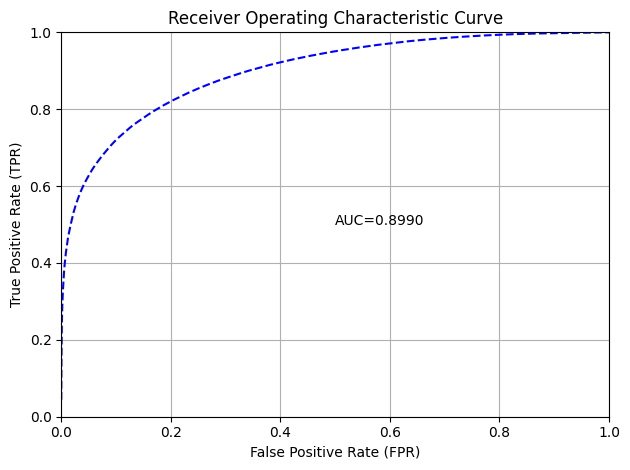

'/content/drive/MyDrive/Law/criminalall-used-perturbation/saved_models/drf_grid_model_1.zip'

In [ ]:

# Call the function to save metrics and plots for the current model
save_classification_metrics_and_plots(best_model,cases2010to2018_test, output_directory)
best_model.save_mojo(path=save_path)


In [ ]:
explanations = best_model.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalall-used-perturbation/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

In [ ]:
explanations = best_model.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalall-used-perturbation/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

In [ ]:
shap_plot = best_model.shap_summary_plot(cases2010to2018_test)

In [ ]:
pd_plot = best_model.pd_plot(cases2010to2018_test, "female_defendant")

In [ ]:
pd_plot1 = best_model.pd_plot(cases2010to2018_test, "filing_judge_tenure_at_filing")

In [ ]:
pd_plot2 = best_model.pd_plot(cases2010to2018_test, "section_s")

In [ ]:
pd_plot3 = best_model.pd_plot(cases2010to2018_test, "state_district")

In [ ]:
pd_plot4 = best_model.pd_plot(cases2010to2018_test, "judge_position_s")

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used-perturbation/performance"
columns = ["number_sections_ipc_category", "female_defendant" ,"filing_judge_tenure_at_filing" , "female_petitioner", "bailable_ipc", "female_judge_filing", "act_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

    # Save the plot to an image file based on the column name
    #plot_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.png")
    #plt.savefig(plot_file_path)

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used-perturbation/performance"
columns = ["female_defendant"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

    # Save the plot to an image file based on the column name
    plot_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.png")
    plt.savefig(plot_file_path)

In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalall-used-perturbation/performance"
columns = ["filing_judge_tenure_at_filing", "section_s", "state_district", "judge_position_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

In [ ]:
import random

explanations_dir = "/content/drive/MyDrive/Law/criminalall-used-perturbation/explanation_ind_plots"
os.makedirs(explanations_dir, exist_ok=True)


num_rows_to_explain = 10
random_indices = random.sample(range(cases2010to2018_test.nrow), num_rows_to_explain)
table_data = []

def save_plots_row(plot_data,plots_dir, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots_row(value, plots_dir, parent_key=f"{parent_key}_{key}")

# Explain each of the selected rows and save the explanations
for row_index in random_indices:
    print(row_index)
    # explanation = best_model.explain_row(cases2010to2018_test, row_index)
    # Retrieve the actual values and model predictions

    # Call the function to save plots
    #save_plots_row(explanation,explanations_dir, row_index)
    actual_value = cases2010to2018_test[row_index, 'pendency_model_multiyear']
    #model_prediction = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame().iloc[0, 0]

    # Append the details to the table_data list
    #table_data.append({'Serial Number': row_index, 'Original': actual_value, 'Model Prediction': model_prediction})

        # Prediction and probabilities
    model_prediction_df = best_model.predict(cases2010to2018_test[row_index, :]).as_data_frame()
    label = model_prediction_df['predict'].iloc[0]
    probability = model_prediction_df[label].iloc[0]  # Probability of the predicted label

    # Append the details to the table_data list
    table_data.append({
        'Serial Number': row_index,
        'Original': actual_value,
        'Model Prediction Label': label,
        'Model Prediction Probability': probability
    })

# Create a DataFrame from the list
results_table = pd.DataFrame(table_data)

# Print or save the table as needed
print(results_table)
# Optionally save the table to a CSV file
table_filename = f"{explanations_dir}/randompredictions.csv"
results_table.to_csv(table_filename, index=False)